In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# ESS嗜睡問卷調查
data_ESS = pd.read_csv('ESS.csv')
data_ESS = data_ESS.drop(data_ESS.columns[[0, 1, 4, 5]], axis = 1)
data_ESS.columns.values[0] = "A_before"
data_ESS.columns.values[1] = "A_after"
data_ESS.columns.values[2] = "C_before"
data_ESS.columns.values[3] = "C_after"

In [16]:
data_ESS

,A_before,A_after,C_before,C_after
0,8,1,8,5
1,7,4,8,4
2,0,6,4,2
3,7,3,7,8
4,13,11,6,3


In [17]:
A_before= np.array(data_ESS['A_before'])
A_after= np.array(data_ESS['A_after'])
C_before= np.array(data_ESS['C_before'])
C_after= np.array(data_ESS['C_after'])

Text(0, 0.5, 'Frequency')

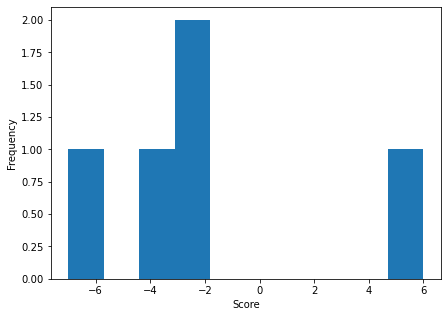

In [18]:
from scipy import stats
diff_A= A_after- A_before
diff_C= C_after- C_before

fig = plt.figure(figsize=(7,5))   
plt.hist(diff_A, bins=10) 
plt.xlabel('Score')
plt.ylabel('Frequency')
#plt.axvline(x=np.mean(difference), c ='r')
#plt.text(np.mean(difference)-2, 9, round(np.mean(difference),3), c='r')


In [19]:
# Paired T-test
result_Ap= stats.ttest_rel(A_before, A_after)
result_Cp= stats.ttest_rel(C_before, C_after)

print('Paired T-test Results for A')
print(result_Ap)
print('')
print('Paired T-test Results for C')
print(result_Cp)

Paired T-test Results for A
TtestResult(statistic=0.9225312080288851, pvalue=0.40846070846523685, df=4)

Paired T-test Results for C
TtestResult(statistic=2.5574480523640246, pvalue=0.06280761100070112, df=4)


In [20]:
# Wilcoxon signed-rank test
from scipy.stats import wilcoxon
result_Aw= wilcoxon(diff_A, alternative='less')
result_Cw= wilcoxon(diff_C, alternative='less')

print('Wilcoxon Results for A')
print(result_Aw)
print('')
print('Wilcoxon Results for C')
print(result_Cw)

Wilcoxon Results for A
WilcoxonResult(statistic=4.0, pvalue=0.21875)

Wilcoxon Results for C
WilcoxonResult(statistic=1.0, pvalue=0.0625)


In [21]:
# Pittsburge 

In [22]:
data_Pit = np.loadtxt('Pittsburge.csv', delimiter=',', skiprows= 1, dtype= str, unpack= True)

In [23]:
# 匹茲堡睡眠品質量表

item= ['睡眠品質', '睡眠潛伏期', '睡眠時數', '睡眠效率', '睡眠困擾', '安眠藥物使用', '日見活動失能', '總分'] 


def result(item, no, Ab, Aa, Cb, Ca):
    n=0
    for i in range(no):
        A_before2_1= Ab[0+n:5+n].astype(float)
        A_after2_1= Aa[0+n:5+n].astype(float)
        C_before2_1= Cb[0+n:5+n].astype(float)
        C_after2_1= Ca[0+n:5+n].astype(float)

        print(item[i])
        print('Paired T-test Results for A')
        result_Ap= stats.ttest_rel(A_before2_1, A_after2_1)
        print(result_Ap)
        print('Paired T-test Results for C')
        result_Cp= stats.ttest_rel(C_before2_1, C_after2_1)
        print(result_Cp)
        print('')

        try:
            print('Wilcoxon Results for A')
            result_Aw= wilcoxon(A_before2_1, A_after2_1, alternative='less')
            print(result_Ap)
            print('Wilcoxon Results for C')
            result_Cw= wilcoxon(C_before2_1, C_after2_1, alternative='less')
            print(result_Cp)

        except ValueError:
            print('前後組沒有差異，無法比較')

        print('')
        n+= 7

In [24]:
result(item[:4], 4, data_Pit[3], data_Pit[4], data_Pit[7], data_Pit[8])
result(item[4:], 4, data_Pit[12], data_Pit[13], data_Pit[16], data_Pit[17])

睡眠品質
Paired T-test Results for A
TtestResult(statistic=-1.632993161855452, pvalue=0.17780780835622126, df=4)
Paired T-test Results for C
TtestResult(statistic=nan, pvalue=nan, df=4)

Wilcoxon Results for A
TtestResult(statistic=-1.632993161855452, pvalue=0.17780780835622126, df=4)
Wilcoxon Results for C
前後組沒有差異，無法比較

睡眠潛伏期
Paired T-test Results for A
TtestResult(statistic=-0.9999999999999999, pvalue=0.373900966300059, df=4)
Paired T-test Results for C
TtestResult(statistic=-0.9999999999999999, pvalue=0.373900966300059, df=4)

Wilcoxon Results for A
TtestResult(statistic=-0.9999999999999999, pvalue=0.373900966300059, df=4)
Wilcoxon Results for C
TtestResult(statistic=-0.9999999999999999, pvalue=0.373900966300059, df=4)

睡眠時數
Paired T-test Results for A
TtestResult(statistic=-0.9999999999999999, pvalue=0.373900966300059, df=4)
Paired T-test Results for C
TtestResult(statistic=0.5345224838248488, pvalue=0.6213082950374971, df=4)

Wilcoxon Results for A
TtestResult(statistic=-0.99999999999

/Users/jielinglee/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/jielinglee/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [25]:
# SF-36
data_SF36= np.loadtxt('SF36.csv', delimiter=',', skiprows= 1, dtype= str, unpack= True)

In [26]:
item= ['生理功能', '生理職能', '軀體疼痛', '總體健康', '軀體健康總測量', '總分', '活力', '社會功能', '情感職能', '精神健康', '心理健康總測量']

result(item[:6], 6, data_SF36[3], data_SF36[4], data_SF36[7], data_SF36[8])
result(item[6:], 5, data_SF36[12], data_SF36[13], data_SF36[16], data_SF36[17])

生理功能
Paired T-test Results for A
TtestResult(statistic=-2.4494897427831783, pvalue=0.07048399691021993, df=4)
Paired T-test Results for C
TtestResult(statistic=-1.0, pvalue=0.373900966300059, df=4)

Wilcoxon Results for A
TtestResult(statistic=-2.4494897427831783, pvalue=0.07048399691021993, df=4)
Wilcoxon Results for C
TtestResult(statistic=-1.0, pvalue=0.373900966300059, df=4)

生理職能
Paired T-test Results for A
TtestResult(statistic=1.0, pvalue=0.373900966300059, df=4)
Paired T-test Results for C
TtestResult(statistic=1.0, pvalue=0.373900966300059, df=4)

Wilcoxon Results for A
TtestResult(statistic=1.0, pvalue=0.373900966300059, df=4)
Wilcoxon Results for C
TtestResult(statistic=1.0, pvalue=0.373900966300059, df=4)

軀體疼痛
Paired T-test Results for A
TtestResult(statistic=0.3015113445777636, pvalue=0.778049548900021, df=4)
Paired T-test Results for C
TtestResult(statistic=-2.4494897427831783, pvalue=0.07048399691021993, df=4)

Wilcoxon Results for A
TtestResult(statistic=0.301511344577

In [27]:
# HRV 
data_HRV = np.loadtxt('HRV.csv', delimiter=',', skiprows= 1, dtype= str, unpack= True)

In [28]:
def result2(item, no, t1, t2, Ab, Aa, Cb, Ca):
    n=0
    for i in range(no):
        A_before2_1= Ab[0+n:t1+n].astype(float)
        A_after2_1= Aa[0+n:t1+n].astype(float)
        C_before2_1= Cb[0+n:t2+n].astype(float)
        C_after2_1= Ca[0+n:t2+n].astype(float)

        print(item[i])
        print('第一次： Paired T-test Results')
        result_Ap= stats.ttest_rel(A_before2_1, A_after2_1)
        print(result_Ap)
        print('第二次： Paired T-test Results')
        result_Cp= stats.ttest_rel(C_before2_1, C_after2_1)
        print(result_Cp)
        print('')

        try:
            print('第一次： Wilcoxon Results')
            result_Aw= wilcoxon(A_before2_1, A_after2_1, alternative='less')
            print(result_Ap)
            print('第二次： Wilcoxon Results')
            result_Cw= wilcoxon(C_before2_1, C_after2_1, alternative='less')
            print(result_Cp)

        except ValueError:
            print('前後組沒有差異，無法比較')

        print('')
        n+= 8

In [29]:
item2= ['SDNN', 'RMSSD', 'ANS', 'TP'] 

print('A面膜')
print('')
print('比較前和中')
result2(item2, 4, 5, 5, data_HRV[3][2:], data_HRV[4][2:], data_HRV[7][2:], data_HRV[8][2:])
print('')
print('比較中和後')
result2(item2, 4, 5, 5, data_HRV[4][2:], data_HRV[5][2:], data_HRV[8][2:], data_HRV[9][2:])
print('')
print('比較前和後')
result2(item2, 4, 5, 5, data_HRV[3][2:], data_HRV[5][2:], data_HRV[7][2:], data_HRV[9][2:])

A面膜

比較前和中
SDNN
第一次： Paired T-test Results
TtestResult(statistic=-0.7499252835925282, pvalue=0.4949997638093496, df=4)
第二次： Paired T-test Results
TtestResult(statistic=-1.5581746108922154, pvalue=0.19419227685151966, df=4)

第一次： Wilcoxon Results
TtestResult(statistic=-0.7499252835925282, pvalue=0.4949997638093496, df=4)
第二次： Wilcoxon Results
TtestResult(statistic=-1.5581746108922154, pvalue=0.19419227685151966, df=4)

RMSSD
第一次： Paired T-test Results
TtestResult(statistic=-1.0560337936221027, pvalue=0.3505129281201349, df=4)
第二次： Paired T-test Results
TtestResult(statistic=-1.0886621079036347, pvalue=0.33750185654036463, df=4)

第一次： Wilcoxon Results
TtestResult(statistic=-1.0560337936221027, pvalue=0.3505129281201349, df=4)
第二次： Wilcoxon Results
TtestResult(statistic=-1.0886621079036347, pvalue=0.33750185654036463, df=4)

ANS
第一次： Paired T-test Results
TtestResult(statistic=-0.36740522604809095, pvalue=0.7319302630201028, df=4)
第二次： Paired T-test Results
TtestResult(statistic=-0.946453

In [30]:
print('C面膜')
print('')
print('比較前和中')
result2(item2, 4, 6, 5, data_HRV[12][2:], data_HRV[13][2:], data_HRV[16][2:], data_HRV[17][2:])
print('')

print('比較中和後')
result2(item2, 4, 6, 5, data_HRV[13][2:], data_HRV[14][2:], data_HRV[17][2:], data_HRV[18][2:])
print('')
print('比較前和後')
result2(item2, 4, 6, 5, data_HRV[12][2:], data_HRV[14][2:], data_HRV[16][2:], data_HRV[18][2:])

C面膜

比較前和中
SDNN
第一次： Paired T-test Results
TtestResult(statistic=-1.93473452879003, pvalue=0.11081589982140165, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-1.2317134514657393, pvalue=0.28551578029409896, df=4)

第一次： Wilcoxon Results
TtestResult(statistic=-1.93473452879003, pvalue=0.11081589982140165, df=5)
第二次： Wilcoxon Results
TtestResult(statistic=-1.2317134514657393, pvalue=0.28551578029409896, df=4)

RMSSD
第一次： Paired T-test Results
TtestResult(statistic=1.1556560209907172, pvalue=0.30004154100022956, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-1.2004900959975617, pvalue=0.296181029336144, df=4)

第一次： Wilcoxon Results
TtestResult(statistic=1.1556560209907172, pvalue=0.30004154100022956, df=5)
第二次： Wilcoxon Results
TtestResult(statistic=-1.2004900959975617, pvalue=0.296181029336144, df=4)

ANS
第一次： Paired T-test Results
TtestResult(statistic=1.368551009433379, pvalue=0.2294256824045587, df=5)
第二次： Paired T-test Results
TtestResult(statistic=0.4458544424732421

In [31]:
def result3(item, no, t1, t2, Ab, Aa, Cb, Ca):
    n=0
    for i in range(no):
        A_before2_1= Ab[0+n:t1+n].astype(float)
        A_after2_1= Aa[0+n:t1+n].astype(float)
        C_before2_1= Cb[0+n:t2+n].astype(float)
        C_after2_1= Ca[0+n:t2+n].astype(float)

        print(item[i])
        print('面膜A： Paired T-test Results')
        result_Ap= stats.ttest_rel(A_before2_1, A_after2_1)
        print(result_Ap)
        print('面膜C： Paired T-test Results')
        result_Cp= stats.ttest_rel(C_before2_1, C_after2_1)
        print(result_Cp)
        print('')

        try:
            print('面膜A： Wilcoxon Results')
            result_Aw= wilcoxon(A_before2_1, A_after2_1, alternative='less')
            print(result_Ap)
            print('面膜C： Wilcoxon Results')
            result_Cw= wilcoxon(C_before2_1, C_after2_1, alternative='less')
            print(result_Cp)

        except ValueError:
            print('前後組沒有差異，無法比較')

        print('')
        n+= 8

In [32]:
print('第一次前和第二次後')
result3(item2, 4, 5, 5, data_HRV[3][2:], data_HRV[8][2:], data_HRV[12][2:], data_HRV[18][2:])

第一次前和第二次後
SDNN
面膜A： Paired T-test Results
TtestResult(statistic=0.16117898594930044, pvalue=0.879765582100132, df=4)
面膜C： Paired T-test Results
TtestResult(statistic=-1.3772574915171982, pvalue=0.2404793852875553, df=4)

面膜A： Wilcoxon Results
TtestResult(statistic=0.16117898594930044, pvalue=0.879765582100132, df=4)
面膜C： Wilcoxon Results
TtestResult(statistic=-1.3772574915171982, pvalue=0.2404793852875553, df=4)

RMSSD
面膜A： Paired T-test Results
TtestResult(statistic=0.6070237802074278, pvalue=0.5766045964104635, df=4)
面膜C： Paired T-test Results
TtestResult(statistic=0.1500440244760039, pvalue=0.887991689349794, df=4)

面膜A： Wilcoxon Results
TtestResult(statistic=0.6070237802074278, pvalue=0.5766045964104635, df=4)
面膜C： Wilcoxon Results
TtestResult(statistic=0.1500440244760039, pvalue=0.887991689349794, df=4)

ANS
面膜A： Paired T-test Results
TtestResult(statistic=-1.045350165203839, pvalue=0.3548696943225924, df=4)
面膜C： Paired T-test Results
TtestResult(statistic=2.1080932655896087, pval